# RESIZE IMAGE

In [5]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import image_dataset_from_directory

In [16]:
ds = image_dataset_from_directory('/home/jupyter/data_local/', label_mode=None, image_size=(108, 144))

Found 2361 files belonging to 1 classes.


In [26]:
ds = ds.map(lambda x: x/255)
#ds = ds.map(lambda x: (x, x))
imgs = ds.as_numpy_iterator()

TypeError: in user code:


    TypeError: <lambda>() takes 1 positional argument but 2 were given


AttributeError: 'tuple' object has no attribute 'shape'

In [22]:
imgs[-5].shape

IndexError: tuple index out of range

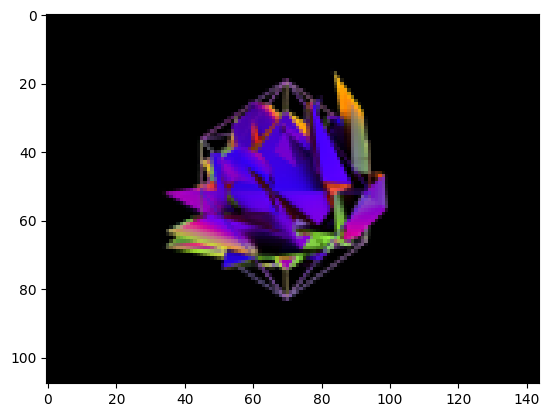

In [97]:
plt.imshow(imgs[1])

In [98]:
from tensorflow.image import resize

In [99]:
type(imgs[2])

numpy.ndarray

In [100]:


# size = (108, 144)

# resized_imgs = resize(imgs, size)

In [101]:
#data_tensor = ragged.constant(imgs[1:100:10])

#adding padding to the tensor to make all images the same shape

In [102]:
X_train = (np.array(imgs)) / 255.

In [103]:
len(X_train)

179

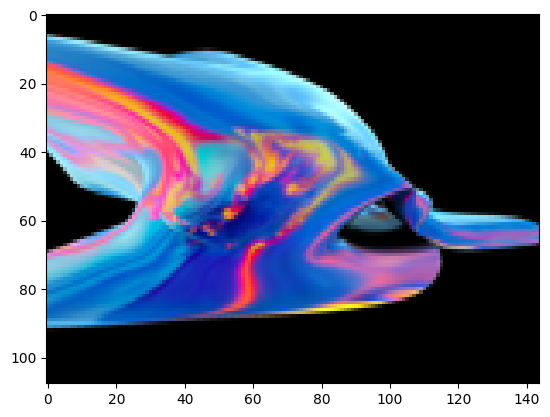

In [104]:
plt.imshow(imgs[0])

In [105]:
def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()
    
    encoder.add(Conv2D(8, (2,2), input_shape=(108, 144, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(16, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(32, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))     

    encoder.add(Flatten())
    encoder.add(Dense(latent_dimension, activation='tanh'))
    
    return encoder

In [106]:
encoder = build_encoder(latent_dimension=2)

In [107]:
from tensorflow.keras.layers import Reshape, Conv2DTranspose
def build_decoder(latent_dimension):
    # $CHALLENGIFY_BEGIN
    decoder = Sequential()
    decoder.add(Dense(3*4*8, activation='tanh', input_shape=(latent_dimension,)))
    decoder.add(Reshape((3, 4, 8)))  # no batch axis here
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (3, 3), strides=3, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(3, (3, 3), strides=3, padding='same', activation='relu'))
    
    return decoder

In [108]:
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 107, 143, 8)       104       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 71, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 70, 16)        528       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 35, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 34, 32)        2080      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 17, 32)      

In [109]:
decoder = build_decoder(2)

In [110]:
decoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 96)                288       
                                                                 
 reshape_1 (Reshape)         (None, 3, 4, 8)           0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 6, 8, 8)          264       
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 12, 16, 8)        264       
 ranspose)                                                       
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 36, 48, 8)        584       
 ranspose)                                                       
                                                      

In [111]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
def build_autoencoder(encoder, decoder):
    inp = Input((108, 144, 3))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    return autoencoder

autoencoder = build_autoencoder(encoder, decoder)

In [112]:
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse', optimizer='adam')

In [115]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10)

compile_autoencoder(autoencoder)
autoencoder.fit(X_train, X_train, epochs = 1000, batch_size = 32, callbacks=[es])

Epoch 1/1000
6/6 [==============================] - 1s 13ms/step - loss: 0.0286
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0284
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0285
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0284
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 6/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 8/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 9/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 10/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 11/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 12/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 13/1000
6/6 [========================

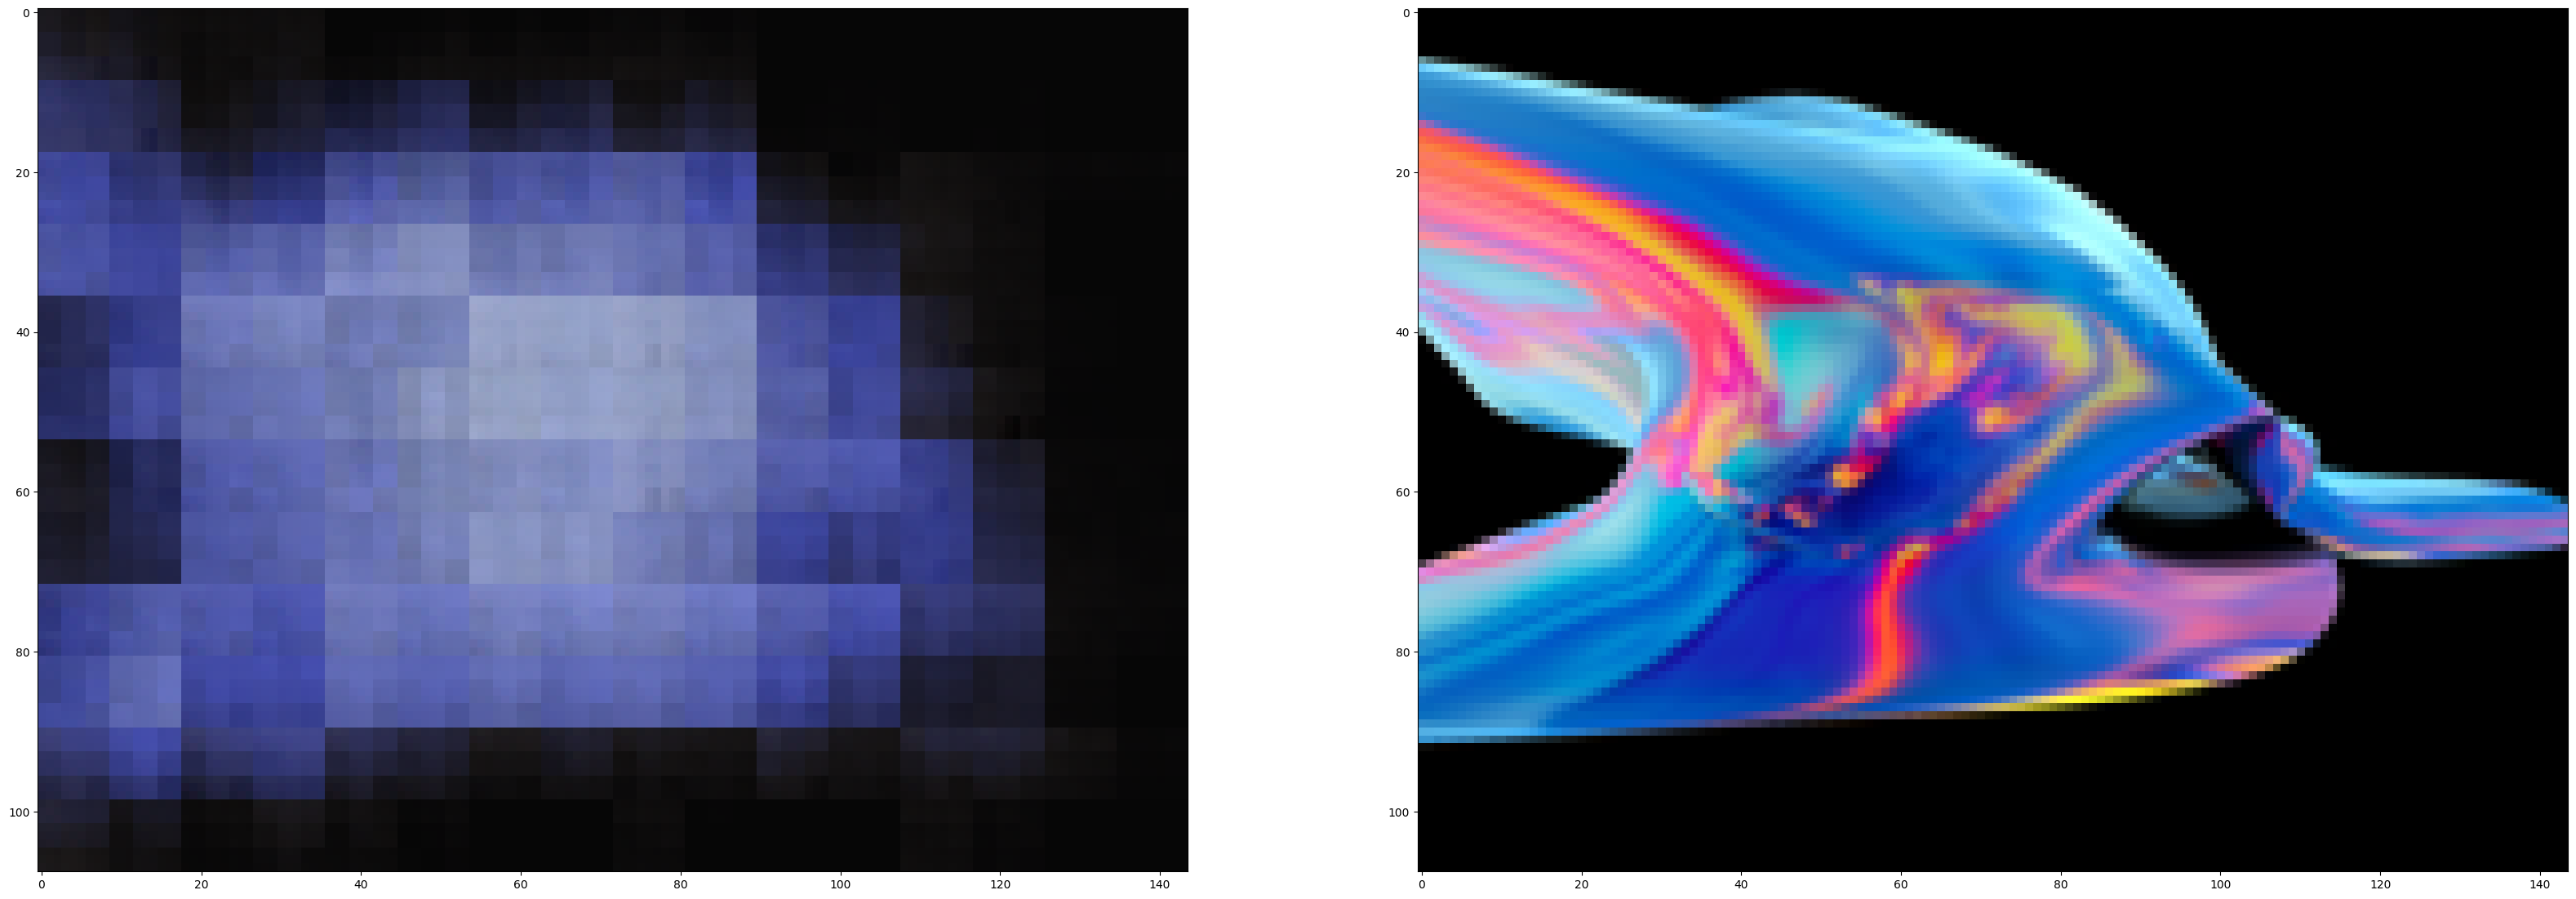

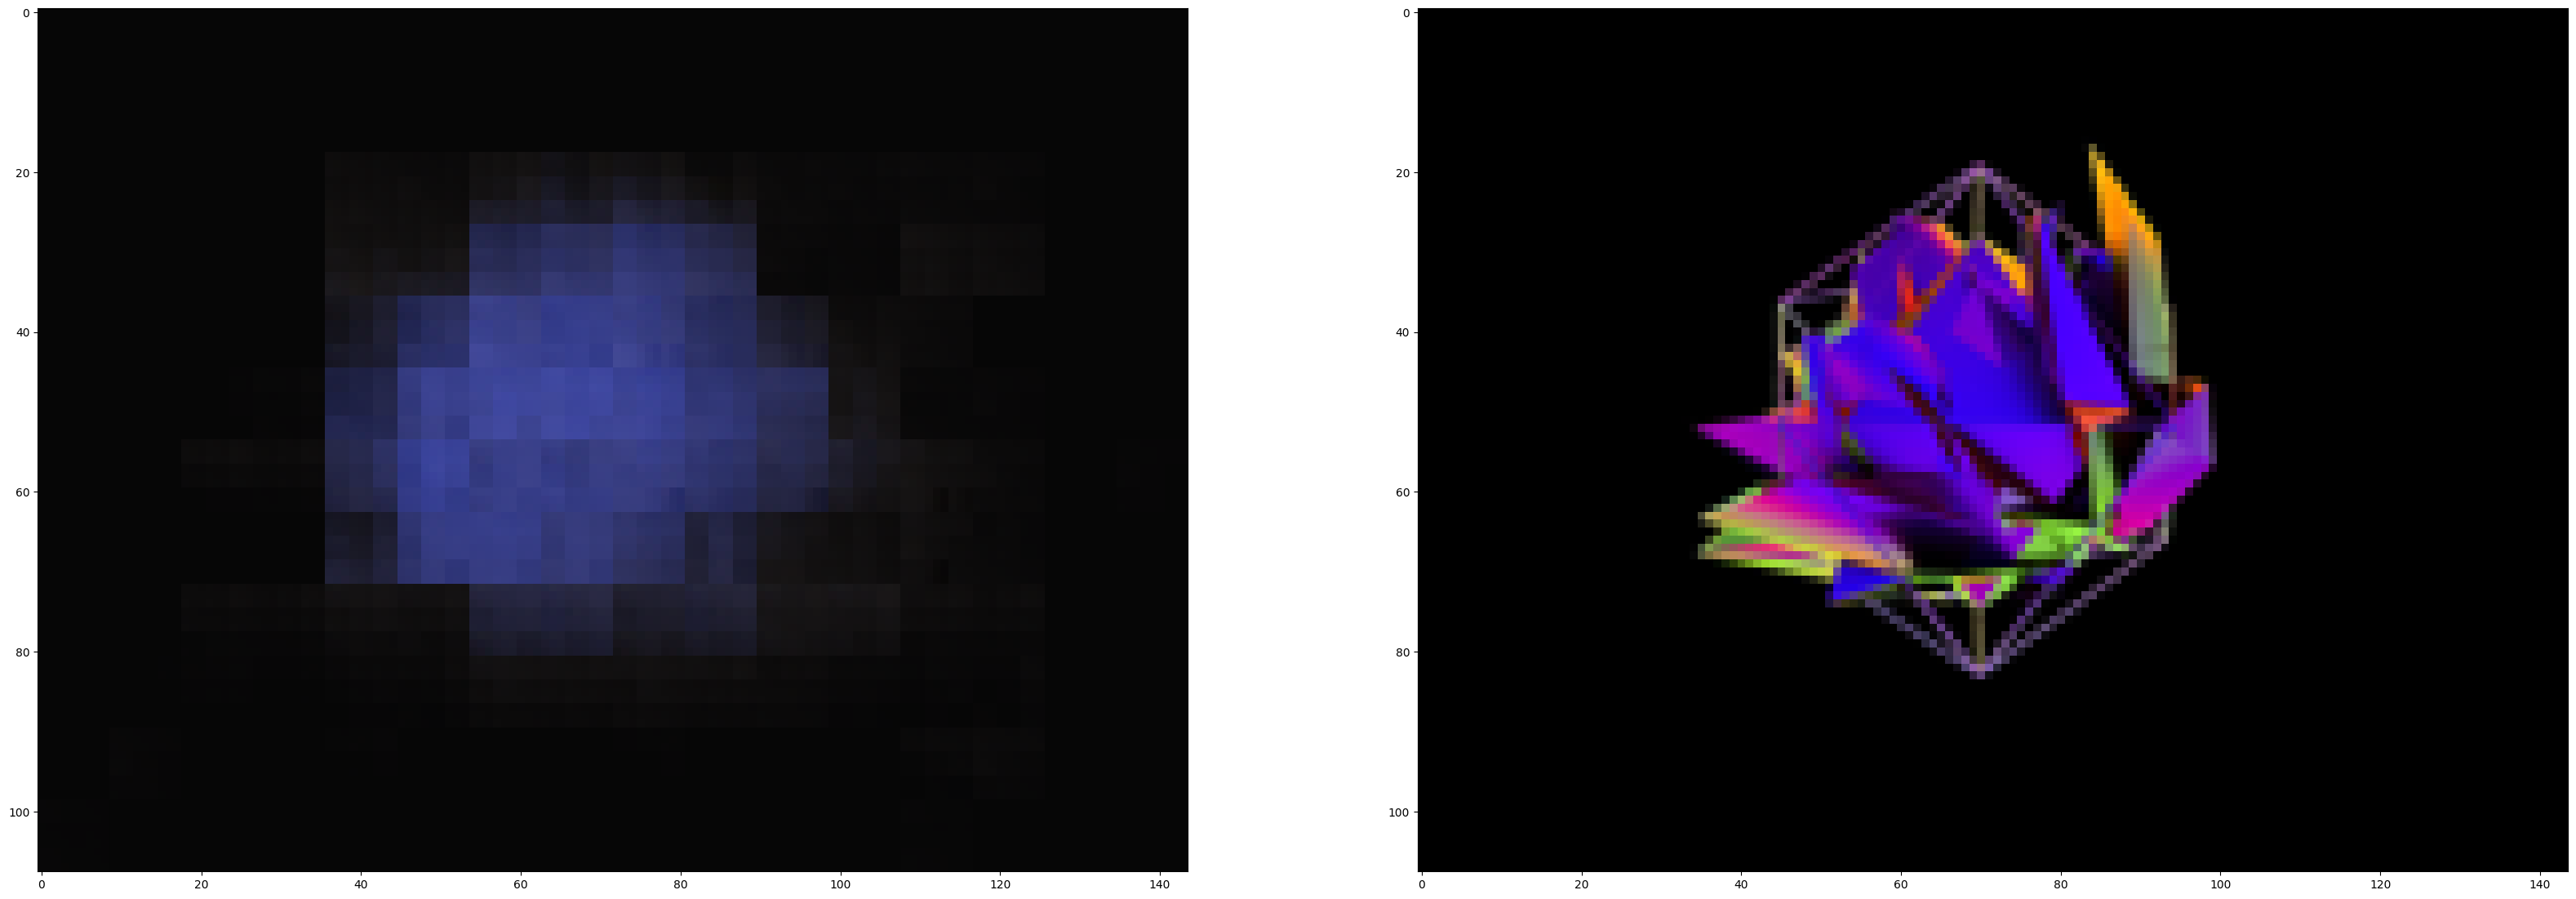

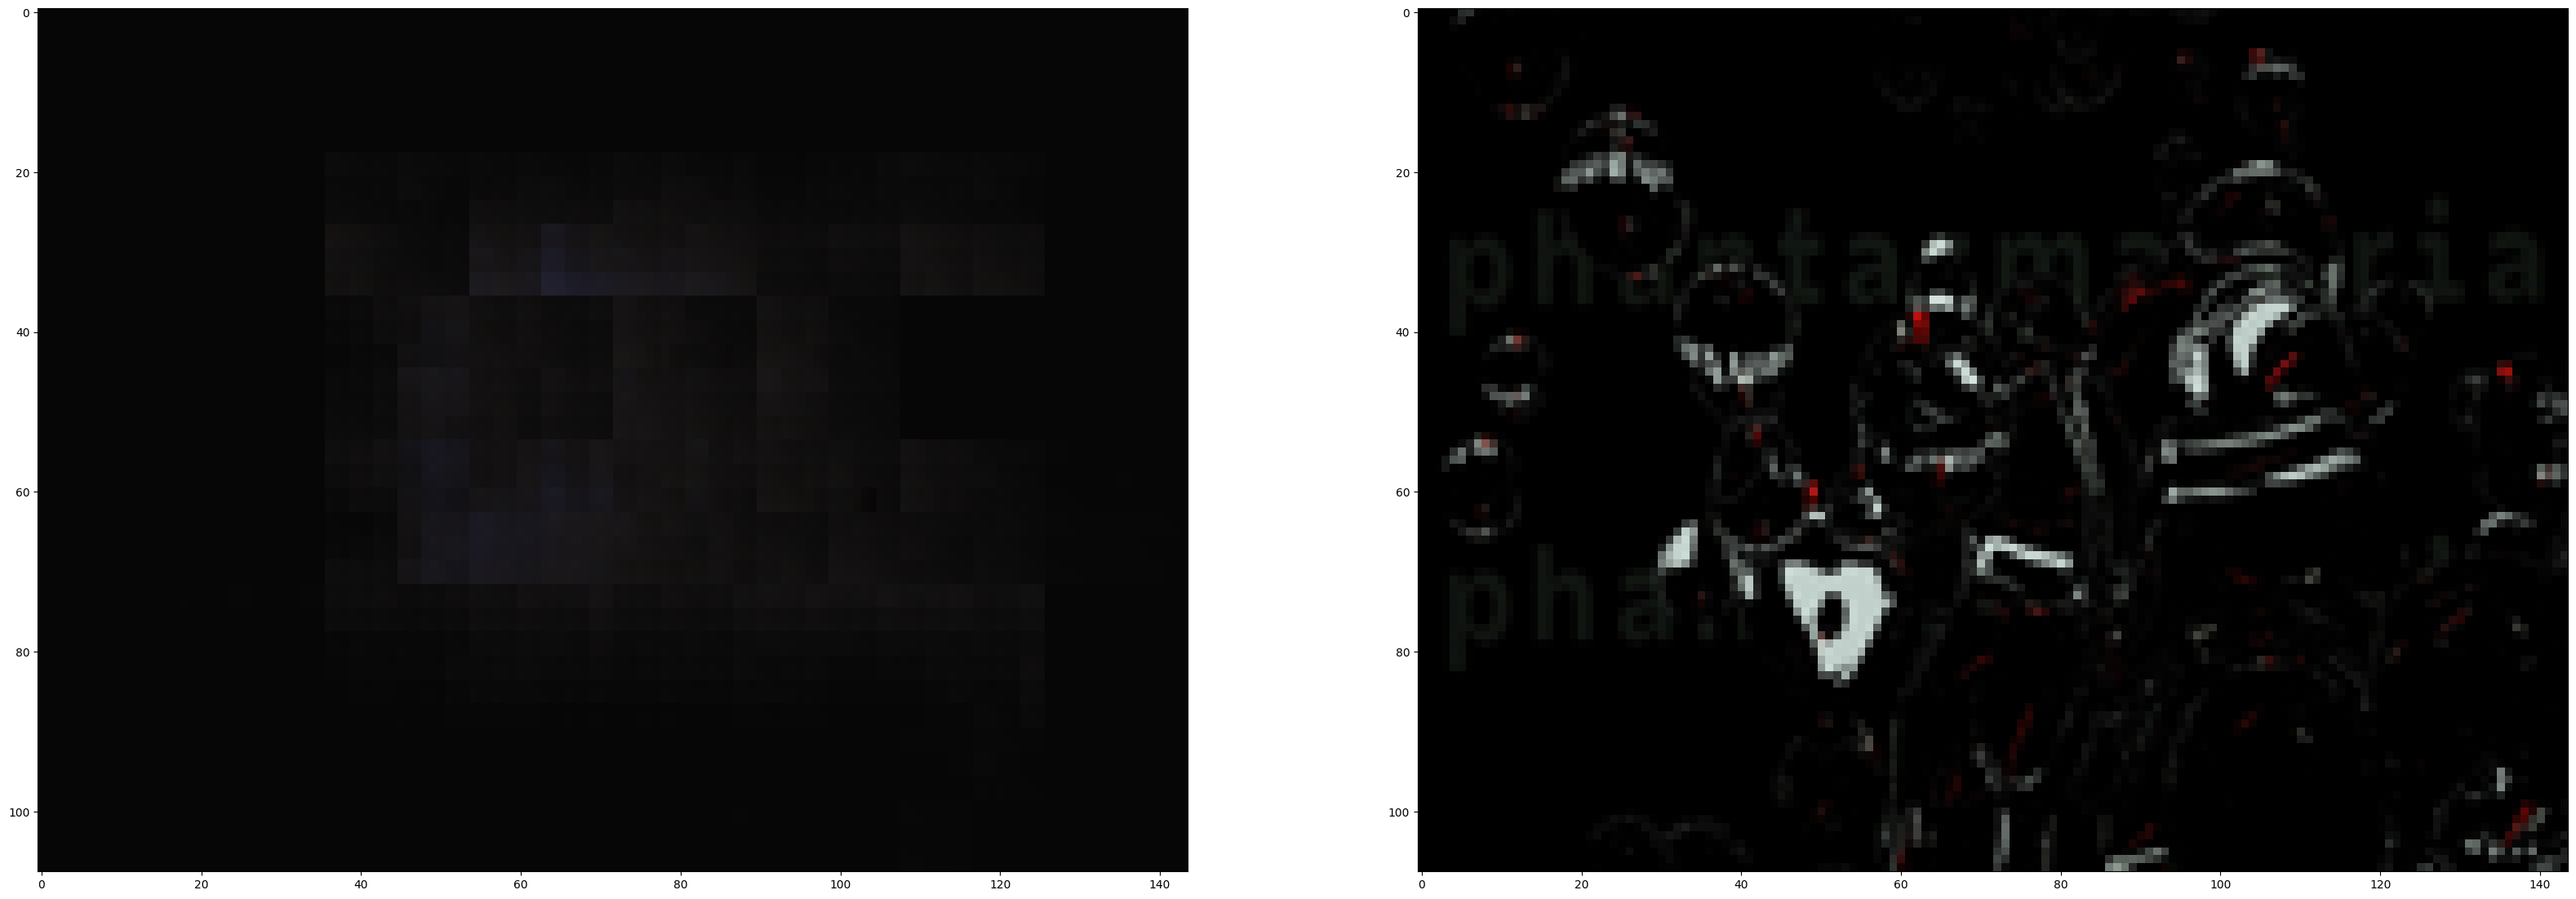

In [116]:
prediction = autoencoder.predict(X_train, verbose=0, batch_size=32)# you can now display an image to see it is reconstructed well

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
    ax1.imshow((prediction[i] * 255).astype(np.uint8))
    ax2.imshow(X_train[i].reshape(108, 144, 3))
    plt.show()
    